In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()
                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [29]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
# df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [10]:
df.columns

Index(['v1', 'v2', 'num_chars'], dtype='object')

In [11]:
df.head()

,v1,v2,num_chars
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
df["v2"][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [40]:
# df.sample(2)
df['v2'][1412]

'Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.'

In [81]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["v1"]=encoder.fit_transform(df["v1"])
df
#  HAM =0
#  SPAM =1

,v1,v2,Target
0,1079,1079,1079
1,3101,3101,3101
2,1000,1000,1000
3,4088,4088,4088
4,2757,2757,2757
...,...,...,...
5567,3992,3992,3992
5568,4560,4560,4560
5569,3286,3286,3286
5570,3901,3901,3901


In [48]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [50]:
df.duplicated().sum()

np.int64(403)

In [52]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [54]:
df.drop_duplicates(keep="first", inplace=True)
df

,v1,v2
0,1079,1079
1,3101,3101
2,1000,1000
3,4088,4088
4,2757,2757
...,...,...
5567,3992,3992
5568,4560,4560
5569,3286,3286
5570,3901,3901


In [55]:
df.duplicated().sum()

np.int64(0)

In [57]:
# df.columns
df.shape

(5169, 2)

In [110]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bablu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [111]:
df

,v1,v2,num_char,num_words,num_sent,new_col,new_char
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,76
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,21
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,127
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,35
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,36
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...,86
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home,21
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest,17
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...,65


In [31]:
df["num_char"] = df["v2"].apply(len)
df

,v1,v2,num_char
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [34]:
df["num_words"] = df["v2"].apply(lambda x:len(nltk.word_tokenize(x)))
df["num_sent"] = df["v2"].apply(lambda x:len(nltk.sent_tokenize(x)))
df

,v1,v2,num_char,num_words,num_sent
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


## Data Preprocessing
- lowercase
- Tokenization
- Removing special chars
- removing stopwords and punctuation
- steaming

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bablu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [37]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [38]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  t=y[:]
  y.clear()
  for i in t:
    y.append(ps.stem(i))
  return " ".join(y)

In [40]:
transform_text(" i love play football@@ ??")

'love play footbal'

In [41]:
df['new_col']=df['v2'].apply(transform_text)

In [54]:
df["new_char"] = df["new_col"].apply(len)

df

,v1,v2,num_char,num_words,num_sent,new_col,new_char
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,76
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,21
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,127
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,35
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,36
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...,86
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home,21
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest,17
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...,65


In [71]:
from wordcloud import WordCloud


In [72]:
spam_text = df[df["v1"] == "spam"]["v2"].str.cat(sep=" ")

print(len(spam_text))
print(spam_text[:200])

104479
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's FreeMsg Hey there darling it's been 3 week's


In [73]:
wc = WordCloud(width=500, height=200, min_font_size=10, background_color="white")

spam_text = df[df["v1"] == "spam"]["v2"].str.cat(sep=" ")

spam_word_cloud = wc.generate(spam_text)

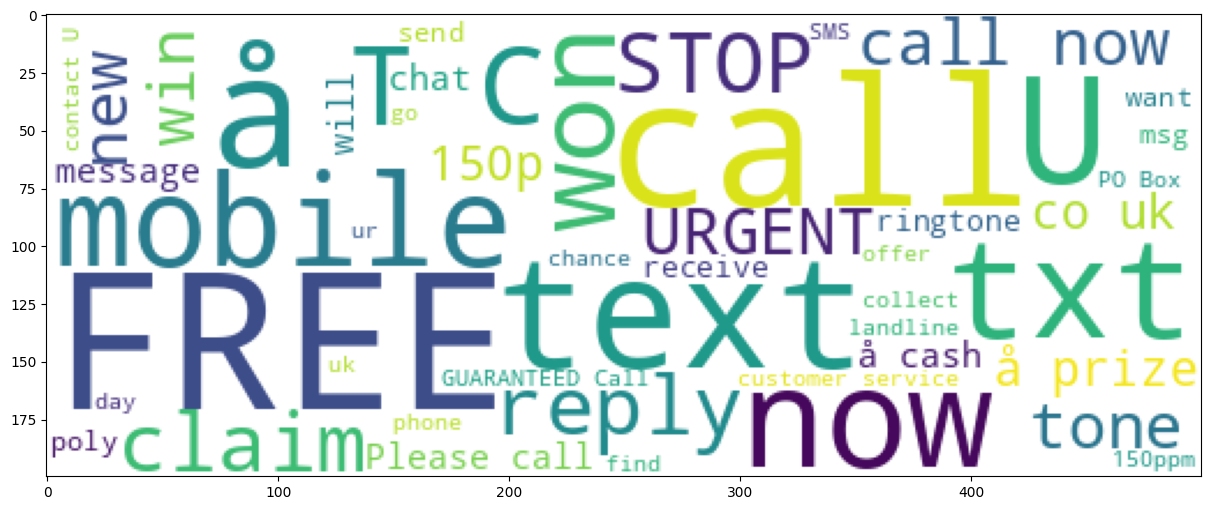

In [79]:
plt.figure(figsize=(15,6))
plt.imshow(spam_word_cloud)

In [87]:
spam_text = df[df["v1"] == "ham"]["v2"].str.cat(sep=" ")


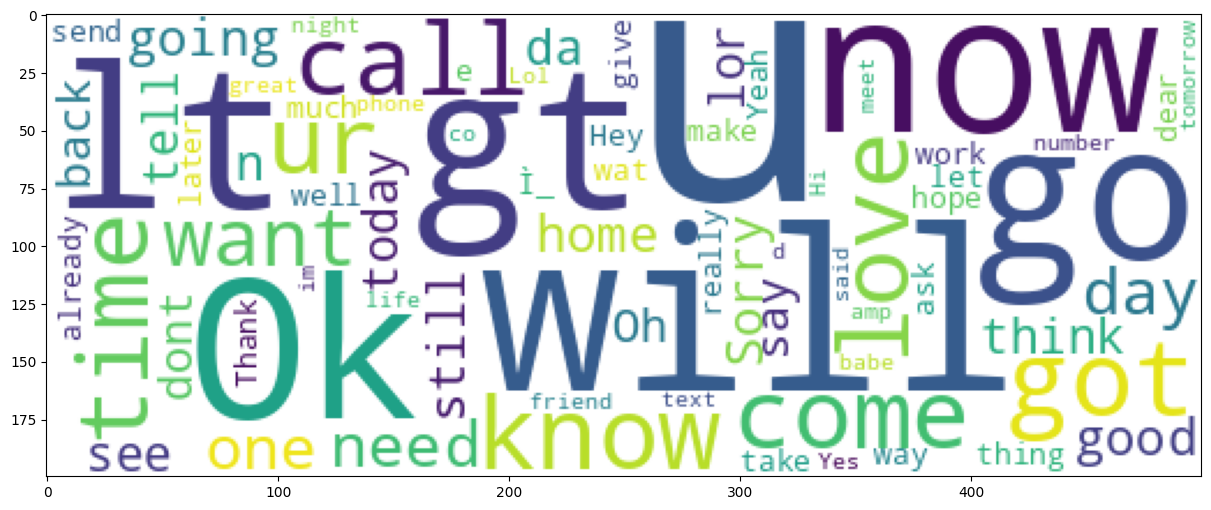

In [109]:
wc = WordCloud(width=500, height=200, min_font_size=10, background_color="white")

ham_text = df[df["v1"] == "ham"]["v2"].str.cat(sep=" ")

ham_word_cloud = wc.generate(ham_text)
plt.figure(figsize=(15,6))
plt.imshow(ham_word_cloud)

## Model Building

In [74]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
cv=CountVectorizer()
tfidf=TfidfTransformer()

In [75]:
x_counts = cv.fit_transform(df['new_col'])
x=tfidf.fit_transform(x_counts).toarray()

In [81]:
y=df["v1"].values

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [85]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score

In [92]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [103]:
gnb.fit(x_train, y_train)
gnb_ypred = gnb.predict(x_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, gnb_ypred))

GaussianNB Accuracy: 0.8690582959641255


In [102]:
mnb.fit(x_train, y_train)
mnb_ypred = mnb.predict(x_test)
print("MultinomialNB Accuracy:", accuracy_score(y_test, mnb_ypred))

MultinomialNB Accuracy: 0.957847533632287


In [101]:
bnb.fit(x_train, y_train)
bnb_ypred = bnb.predict(x_test)
print("BernoulliNB Accuracy:", accuracy_score(y_test, bnb_ypred))

BernoulliNB Accuracy: 0.9695067264573991


## Function to predict on unseen data

In [104]:
def predict_prob(message):
    # process
    transformed = transform_text(message)
    # vectorize
    vector_input = cv.transform([transformed])
    tfidf_input=tfidf.transform(vector_input)
    
    # get probabilities
    prob = mnb.predict_proba(tfidf_input)[0]
    return {"Ham Prob":round(prob[0],2),"Spam":round(prob[1],2)}
    

In [105]:
predict_prob("Congratulations! You have won a free iPhone. Click here to claim now")

{'Ham Prob': np.float64(0.32), 'Spam': np.float64(0.68)}

In [106]:
predict_prob("Urgent! Your account has been suspended. Verify immediately")

{'Ham Prob': np.float64(0.48), 'Spam': np.float64(0.52)}

In [107]:
predict_prob("Hey, are we meeting tomorrow at 10 am?")

{'Ham Prob': np.float64(0.99), 'Spam': np.float64(0.01)}

In [108]:
predict_prob("Call now to claim your lottery reward.")

{'Ham Prob': np.float64(0.3), 'Spam': np.float64(0.7)}

In [ ]:
class inbalanced problem